In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [3]:
torch.__version__

'2.1.0+cu121'

In [4]:
x = torch.empty(3,5)
print(x.dtype)
print(x)

torch.float32
tensor([[ 1.5905e-42,  2.9393e+29, -8.3232e-03,  3.2998e-41,  2.2421e-44],
        [ 1.8499e+20, -8.3230e-03,  3.2998e-41,  1.5961e-42,  1.9432e-19],
        [-8.3232e-03,  3.2998e-41,  2.2421e-44,  1.8037e+28, -8.3230e-03]])


In [5]:
x = torch.randn(3,5)
print(x)

tensor([[-1.3597,  0.2009,  1.0822, -1.0769,  0.0752],
        [ 0.2709,  1.1815,  2.6393,  0.8602, -0.7411],
        [ 0.3097,  0.6748,  0.4961, -0.2462, -0.9703]])


In [6]:
torch.randn?

In [17]:
x.dtype

torch.float32

In [10]:
x.size(),x.shape

(torch.Size([3, 5]), torch.Size([3, 5]))

In [12]:
type(x.size()),type(x.shape)

(torch.Size, torch.Size)

In [13]:
x.size()[1]

5

In [14]:
x.size() == (3,5)

True

Bridge to numpy

In [15]:
y = x.numpy()
print(y)

[[-1.359684    0.20093781  1.0821882  -1.0768801   0.0752406 ]
 [ 0.2708965   1.1815464   2.6393256   0.86021966 -0.7410609 ]
 [ 0.30970418  0.67477214  0.49611062 -0.24615775 -0.97025704]]


In [16]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a.dtype)
print(b)

float64
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [18]:
c = b.long()
print(c.dtype,c)
print(b.dtype,b)

torch.int64 tensor([1, 1, 1, 1, 1])
torch.float64 tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [19]:
xr = torch.randn(3,5)
print(xr.dtype,xr)

torch.float32 tensor([[-2.7899,  0.1773,  0.2248,  0.9718,  0.5026],
        [ 1.3641,  0.8644,  1.4845,  1.5786,  1.3205],
        [ 1.7145,  1.1685,  0.3406, -1.6682,  0.4158]])


In [20]:
resb = xr + b
resb

tensor([[-1.7899,  1.1773,  1.2248,  1.9718,  1.5026],
        [ 2.3641,  1.8644,  2.4845,  2.5786,  2.3205],
        [ 2.7145,  2.1685,  1.3406, -0.6682,  1.4158]], dtype=torch.float64)

In [21]:
resc = xr + c
resc

tensor([[-1.7899,  1.1773,  1.2248,  1.9718,  1.5026],
        [ 2.3641,  1.8644,  2.4845,  2.5786,  2.3205],
        [ 2.7145,  2.1685,  1.3406, -0.6682,  1.4158]])

In [22]:
resb == resc

tensor([[ True, False, False, False, False],
        [False,  True,  True,  True,  True],
        [False, False, False,  True, False]])

In [23]:
torch.set_printoptions(precision = 10)

In [26]:
resb[0,1]

tensor(1.1773418933, dtype=torch.float64)

In [27]:
resc[0,1]

tensor(1.1773419380)

In [28]:
resc[0,1].dtype

torch.float32

In [29]:
xr[0,1]

tensor(0.1773418933)

In [30]:
torch.set_printoptions(precision=4)

Brodcasting

In [32]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
print(A.size())
B = torch.tensor([[5., -5., 5., -5., 5.]])
print(B.size())
C = A + B

torch.Size([4, 1])
torch.Size([1, 5])


In [33]:
C.shape

torch.Size([4, 5])

In-place modification

In [34]:
x

tensor([[-1.3597,  0.2009,  1.0822, -1.0769,  0.0752],
        [ 0.2709,  1.1815,  2.6393,  0.8602, -0.7411],
        [ 0.3097,  0.6748,  0.4961, -0.2462, -0.9703]])

In [35]:
xr

tensor([[-2.7899,  0.1773,  0.2248,  0.9718,  0.5026],
        [ 1.3641,  0.8644,  1.4845,  1.5786,  1.3205],
        [ 1.7145,  1.1685,  0.3406, -1.6682,  0.4158]])

In [36]:
x+xr

tensor([[-4.1496,  0.3783,  1.3070, -0.1051,  0.5778],
        [ 1.6350,  2.0460,  4.1238,  2.4388,  0.5795],
        [ 2.0242,  1.8433,  0.8367, -1.9144, -0.5545]])

In [37]:
x.add_(xr)

tensor([[-4.1496,  0.3783,  1.3070, -0.1051,  0.5778],
        [ 1.6350,  2.0460,  4.1238,  2.4388,  0.5795],
        [ 2.0242,  1.8433,  0.8367, -1.9144, -0.5545]])

In [38]:
print(x)

tensor([[-4.1496,  0.3783,  1.3070, -0.1051,  0.5778],
        [ 1.6350,  2.0460,  4.1238,  2.4388,  0.5795],
        [ 2.0242,  1.8433,  0.8367, -1.9144, -0.5545]])


In [39]:
print(x.t())

tensor([[-4.1496,  1.6350,  2.0242],
        [ 0.3783,  2.0460,  1.8433],
        [ 1.3070,  4.1238,  0.8367],
        [-0.1051,  2.4388, -1.9144],
        [ 0.5778,  0.5795, -0.5545]])


In [41]:
x.t_()
print(x)

tensor([[-4.1496,  1.6350,  2.0242],
        [ 0.3783,  2.0460,  1.8433],
        [ 1.3070,  4.1238,  0.8367],
        [-0.1051,  2.4388, -1.9144],
        [ 0.5778,  0.5795, -0.5545]])


Shared Memory

In [42]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [43]:
a[2] = 0
print(b)

tensor([1., 1., 0., 1., 1.], dtype=torch.float64)


In [44]:
b[3] = 5
print(a)

[1. 1. 0. 5. 1.]


Cuda

In [6]:
torch.cuda.is_available()

True

In [7]:
device = torch.device('cuda')

In [11]:
x = torch.randn(1)
x = x.to(device)

In [12]:
x.device

device(type='cuda', index=0)

CIFAR10

In [16]:
import torchvision
data_dir = 'content/data'

cifar = torchvision.datasets.CIFAR10(data_dir,train=True,download=True)
cifar.data.shape

Files already downloaded and verified


(50000, 32, 32, 3)

In [17]:
x = torch.from_numpy(cifar.data).permute(0,3,1,2).float()
x /=225
print(x.type(),x.size(),x.min().item(),x.max().item())

torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.1333333253860474


In [18]:
x = torch.narrow(x,0,0,48)

In [19]:
x.shape

torch.Size([48, 3, 32, 32])

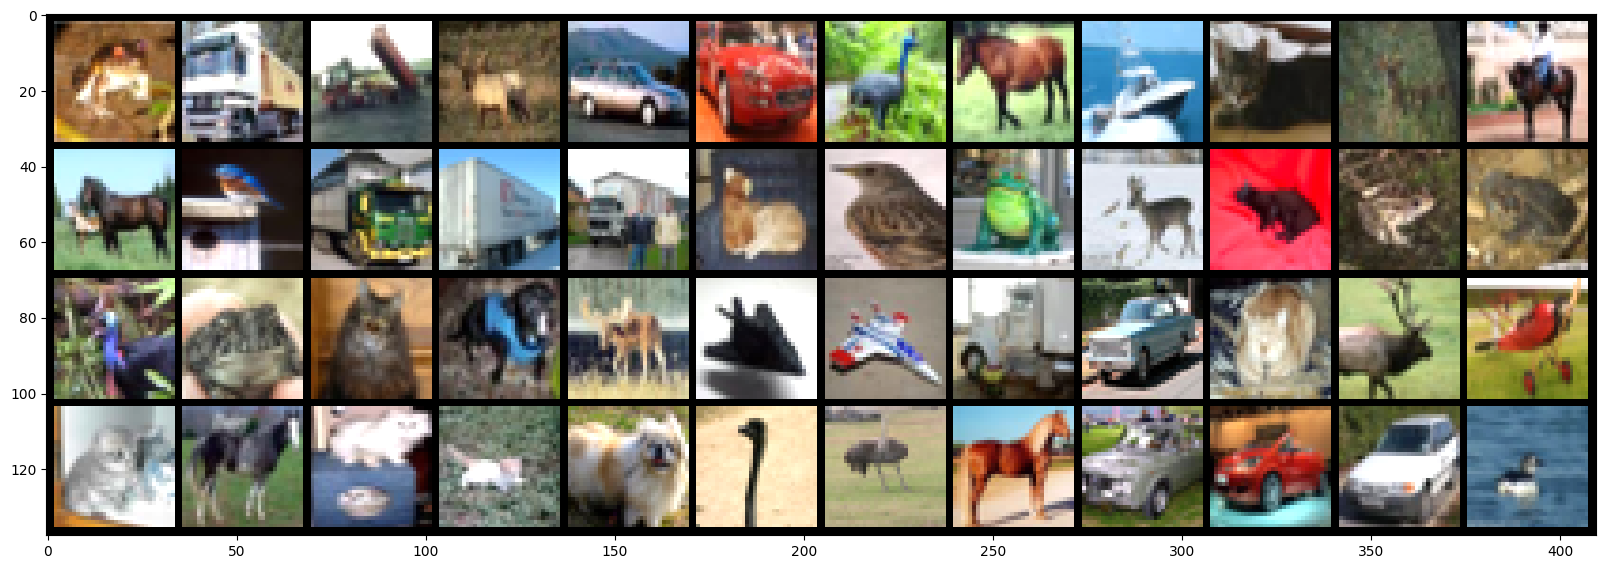

In [21]:
def show(img):
  npimg = img.numpy()
  plt.figure(figsize=(20,10))
  plt.imshow(np.transpose(npimg,(1,2,0)),interpolation='nearest')

show(torchvision.utils.make_grid(x,nrow=12));

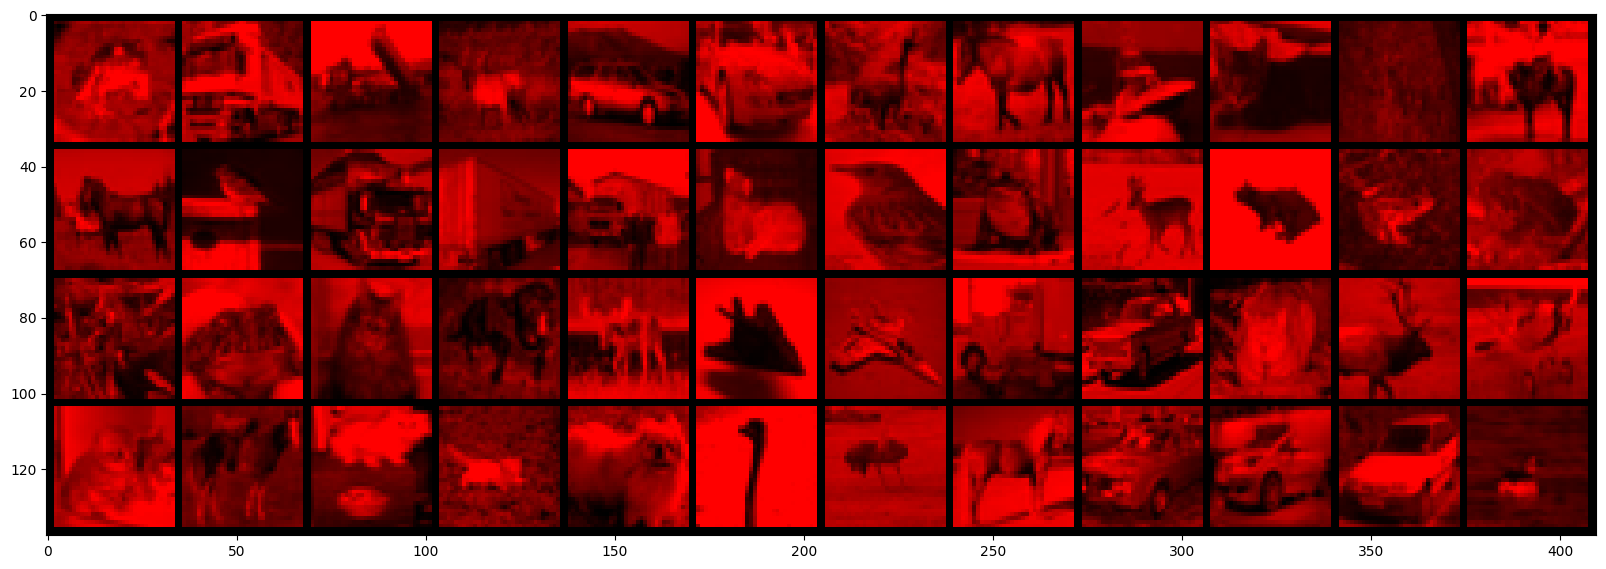

In [22]:
# Kills the green and blue channels
x.narrow(1, 1, 2).fill_(0)
show(torchvision.utils.make_grid(x, nrow = 12))